1. Load the data and the libraries
2. Data preparation and data preprocessing
3. Data Visualization
4. Data Analysis
   1. Uni-Variate Analysis
   2. Bi-Variate (Correlation & Chi-Squared)
   3. Multi-Variate
      1. Supervised
         1. Classification (Y is discrete)
         2. Regression (Y is continuous)
      2. Unsupervised
         1. Clustering
         2. Dimensionality Reduction

# Load the Data & Libraries

Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the data

In [ ]:
train = pd.read_csv('/content/train_ctrUa4K (4).csv')
test = pd.read_csv('/content/test_lAUu6dG (4).csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

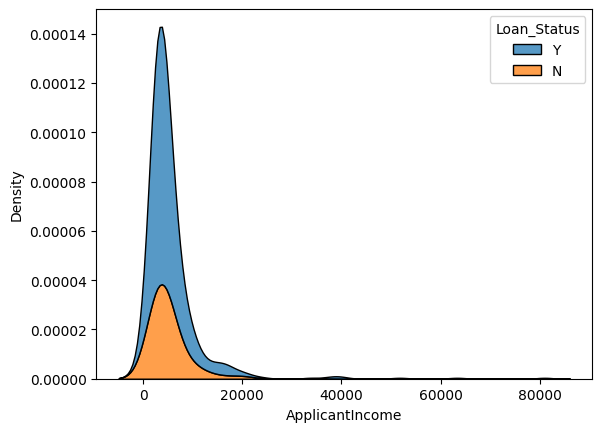

In [ ]:
sns.kdeplot(data=train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

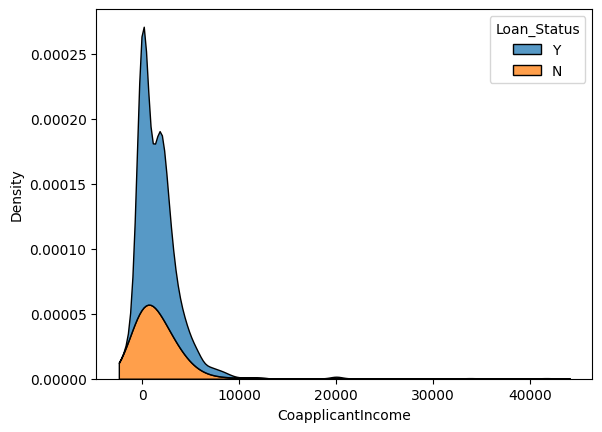

In [ ]:
sns.kdeplot(data=train, x="CoapplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='LoanAmount', ylabel='Density'>

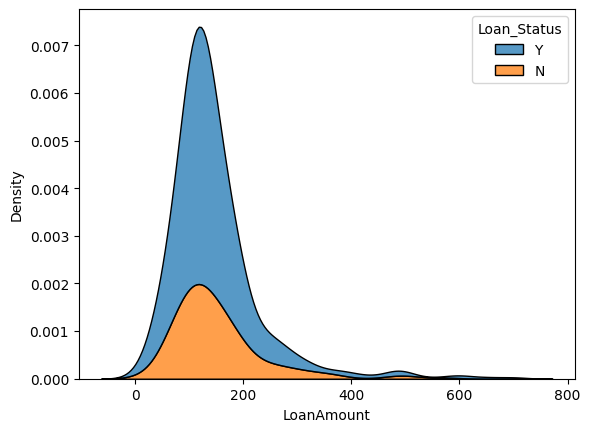

In [ ]:
sns.kdeplot(data=train, x="LoanAmount", hue="Loan_Status", multiple="stack")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

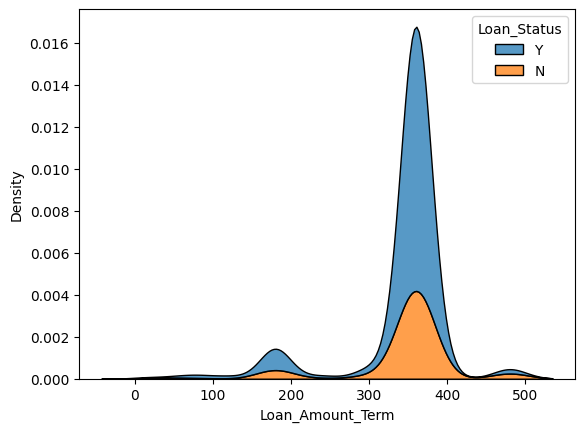

In [ ]:
sns.kdeplot(data=train, x="Loan_Amount_Term", hue="Loan_Status", multiple="stack")

<Axes: ylabel='Loan_Status'>

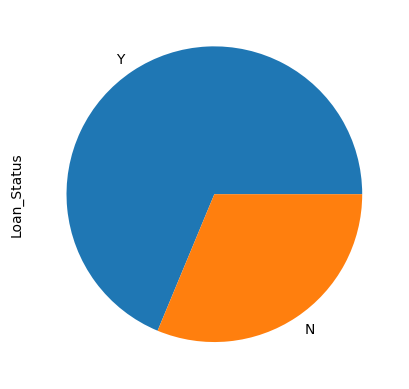

In [ ]:
train['Loan_Status'].value_counts().plot(kind='pie')

<ipython-input-11-3c512ccb5ba5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True)


<Axes: >

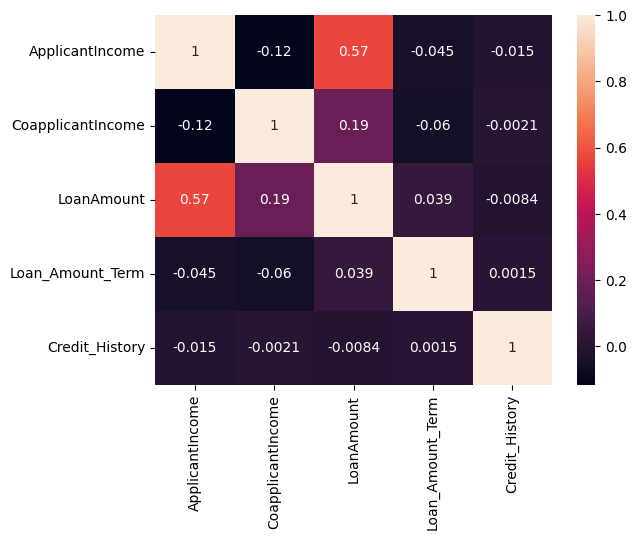

In [ ]:
sns.heatmap(train.corr(),annot = True)

Bi - Variate


In [ ]:
from scipy.stats import chi2_contingency
def chi_sq(var1, var2):
  """Check for Categorical Variable Relationship"""
  table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print('Accept the Alternate Hypothesis', round(p,2))
  else:
    print('Failed to reject the null Hypothesis', round(p,2))
  return table



*   Null Hypothesis: Gender and Loan Status are Independent
*   List item: Gender and Loan Status are Dependent



In [ ]:
pd.crosstab(train['Gender'], train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
chi_sq(train['Gender'], train['Loan_Status'])

Failed to reject the null Hypothesis 0.71


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


# Data Preparation

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
def data_prep(data):
  #Imputation of missing values
  data['Gender'] = np.where(data['Gender'].isna(), data['Gender'].mode(dropna = True)[0], data['Gender'])
  data['Married'] = np.where(data['Married'].isna(), data['Married'].mode(dropna = True)[0], data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(), data['Dependents'].mode(dropna = True), data['Dependents'])
  data['Dependents'].replace('3+', 3, inplace = True)
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(), data['Self_Employed'].mode(dropna = True), data['Self_Employed'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(skipna = True), data['LoanAmount'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(skipna = True), data['Loan_Amount_Term'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(), data['Credit_History'].mode(dropna = True), data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype('int')
  data['Dependents'] = data['Dependents'].astype('int')
  return data

In [ ]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Encode the discrete variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i] = le.fit_transform(data[i])
  return data

In [ ]:
encode(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 62.5 KB


Split the data

In [ ]:
x = train.drop(['Loan_ID','Loan_Status'], axis = 1)
y = train['Loan_Status']

train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


# Apply Multi-variate Model

In [ ]:
logreg = LogisticRegression()
#fit the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logreg.coef_

array([[ 6.26281359e-02,  4.17076622e-01, -9.45258072e-02,
        -4.15246638e-01, -1.46677090e-01, -1.41674766e-05,
        -3.84079290e-05, -5.50042888e-04, -5.04706935e-03,
         2.93027512e+00,  6.02247019e-02]])

In [ ]:
logreg.intercept_

array([0.15680039])

Probability outcomes of the model

In [ ]:
proba_train = logreg.predict_proba(x_train)
proba_train

In [ ]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [ ]:
y_hat_train

In [ ]:
y_train

579    1
199    0
266    1
309    1
589    0
      ..
98     1
322    1
382    1
365    0
510    0
Name: Loan_Status, Length: 491, dtype: int64

Model Evaluation

In [ ]:
conf_matrix_train = confusion_matrix(y_train, y_hat_train)
print(conf_matrix_train)

[[ 65  85]
 [  5 336]]


In [ ]:
conf_matrix_test = confusion_matrix(y_test, y_hat_test)
print(conf_matrix_test)

[[17 25]
 [ 2 79]]


In [ ]:
print('Accuracy score for the train data is: ', accuracy_score(y_train, y_hat_train))

Accuracy score for the train data is:  0.8167006109979633


In [ ]:
print('Accuracy score for the test data is: ', accuracy_score(y_test, y_hat_test))

Accuracy score for the test data is:  0.7804878048780488


In [ ]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [ ]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  1.0
[[150   0]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [ ]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  0.75
[[25 17]
 [14 67]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        42
           1       0.80      0.83      0.81        81

    accuracy                           0.75       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.74      0.75      0.75       123



In [ ]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

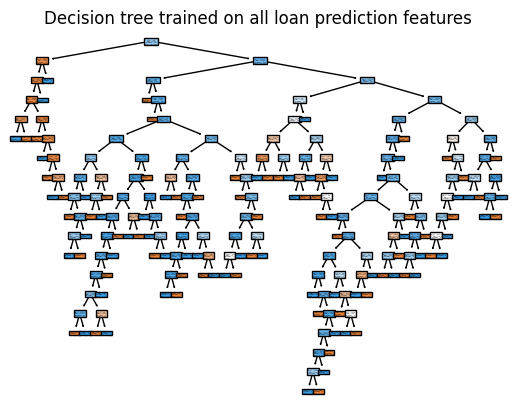

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

In [ ]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
dtree.feature_importances_

array([0.0073594 , 0.01711604, 0.04656294, 0.01221978, 0.02335394,
       0.23844525, 0.11633166, 0.12906131, 0.05283992, 0.30423585,
       0.05247392])

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Credit_History,0.304236
ApplicantIncome,0.238445
LoanAmount,0.129061
CoapplicantIncome,0.116332
Loan_Amount_Term,0.052840
Property_Area,0.052474
Dependents,0.046563
Self_Employed,0.023354
Married,0.017116
Education,0.012220


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200,max_depth = 5, verbose = 1, oob_score=True)
#fit the model
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True, verbose=1)

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [ ]:
model_eval(y_train, y_hat_train_rf)

The Accuracy of the model is:  0.82
[[ 66  84]
 [  2 339]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.61       150
           1       0.80      0.99      0.89       341

    accuracy                           0.82       491
   macro avg       0.89      0.72      0.75       491
weighted avg       0.85      0.82      0.80       491



In [ ]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.78
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



# Application on Test Data

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.5+ KB


In [ ]:
encode(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 34.5 KB


In [ ]:
test.drop(['Loan_ID'], axis = 1, inplace = True)

In [ ]:
test_preds = logreg.predict(test)

In [ ]:
test_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Submission

In [ ]:
submission = pd.read_csv('/content/sample_submission_49d68Cx (2).csv')

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status'] = test_preds

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [ ]:
submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
submission.to_csv('final_submission.csv', index= False)